# Generated Review Evaluation with our real data classifier

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import itertools
import html,re
import textwrap
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
def evaluate_predictions(y_true, y_pred, labels=None, figsize=(8,6)):
    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Macro-F1: {f1_macro:.3f}\n")

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    if labels is None:
        labels = sorted(set(y_true))

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Count', rotation=-90, va='bottom')

    # Tick labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')

    # Annotate cells
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > thresh else "black"
        ax.text(j, i, format(cm[i, j], 'd'),
                ha='center', va='center', color=color)

    plt.tight_layout()
    plt.show()

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'confusion_matrix': cm
    }

In [3]:
# Importing the generated reviews
generated_reviews = pd.read_csv("../data/generated/generated_reviews.csv")

In [4]:
generated_reviews.head()

,author,content
0,joe tangari,The songs in the band's catalog are pretty eas...
1,joe tangari,I can't say for sure what to make of it. I hav...
2,joe tangari,This is not the first time I've heard of an in...
3,joe tangari,I'm not sure if it's possible to have a conver...
4,joe tangari,A lot of musicians have gone on and done great...


In [5]:
pd.set_option('display.max_colwidth', None)
for author in generated_reviews['author'].unique():
    review = generated_reviews.loc[
        generated_reviews['author'] == author, 'content'
    ].sample(1).iloc[0]

    # wrap it at 80 characters per line
    wrapped = textwrap.fill(review, width=80)

    # print with a header and a separator
    print(f"\nRandom review generated for {author}:\n")
    print(wrapped)
    print("\n" + "-"*80)


Random review generated for joe tangari:

The first thing I noticed about the new music, though, was that it wasn't quite
as catchy. It felt like a lot of old school rock to me-- more akin than anything
else on my radar at this point in time (and for good reason). There were so many
bands here who sounded great but didn"t really have any real soul or sense of
humor whatsoever," writes guitarist/vocalist Andrew Kipfelter and drummer Steve
Branscombe before he begins his guitar soloing career with The Lovesick Blues
Brothers' "This Is Your Life." If you've ever heard him play live from anywhere
outside New York City's West Village, be sure not just because they're mostly
kids playing acoustic instruments; when all is said & done well there are plenty
people sitting around listening intently waiting out loud while their keyboards
drift by them over an endless loop until finally we hear one song where nothing
sounds interesting enough! And yet even after three albums since then its still


In [6]:
vectorizer_path = '../vectorizer_and_classifier/word_tfidf_vect.pkl'
model_path = '../vectorizer_and_classifier/svm_word_tfidf.pkl'
vectorizer = joblib.load(vectorizer_path)
model      = joblib.load(model_path)

In [7]:
# we apply the same text cleaning step we did on our original data while creating the embeddings
def clean_text(t: str) -> str:
    t = html.unescape(t or '')                # None/NaN safe
    t = re.sub(r'\s+', ' ', t).strip()        # collapse whitespace
    return (t.replace('“','"').replace('”','"')
             .replace('’',"'").replace('‘',"'"))

generated_reviews['content'] = generated_reviews['content'].astype(str).map(clean_text)

In [8]:
# predict on new raw text:
text = generated_reviews['content']
X_new = vectorizer.transform(text)
y_true = generated_reviews['author']
preds       = model.predict(X_new)

Accuracy: 0.325
Macro-F1: 0.253



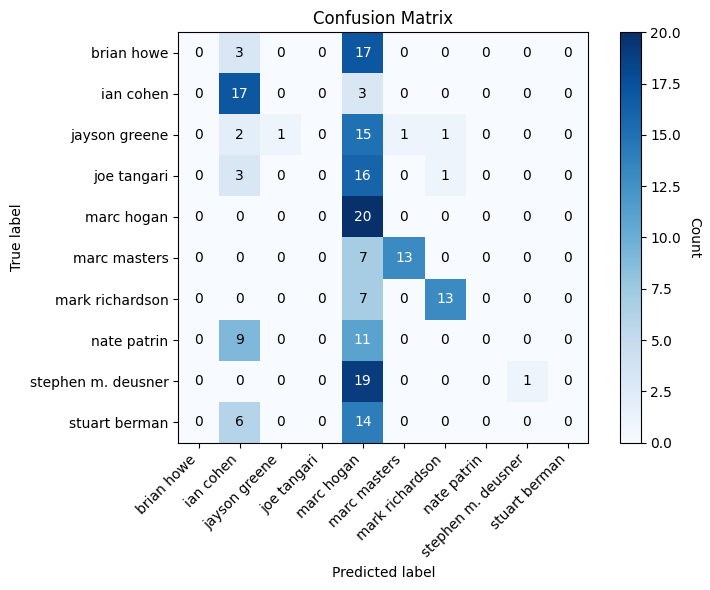

{'accuracy': 0.325,
 'f1_macro': 0.2533162258191867,
 'confusion_matrix': array([[ 0,  3,  0,  0, 17,  0,  0,  0,  0,  0],
        [ 0, 17,  0,  0,  3,  0,  0,  0,  0,  0],
        [ 0,  2,  1,  0, 15,  1,  1,  0,  0,  0],
        [ 0,  3,  0,  0, 16,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  7, 13,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  7,  0, 13,  0,  0,  0],
        [ 0,  9,  0,  0, 11,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 19,  0,  0,  0,  1,  0],
        [ 0,  6,  0,  0, 14,  0,  0,  0,  0,  0]])}

In [9]:
evaluate_predictions(y_true=y_true, y_pred=preds)